In [1]:
%matplotlib inline

In [2]:
import math as math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats

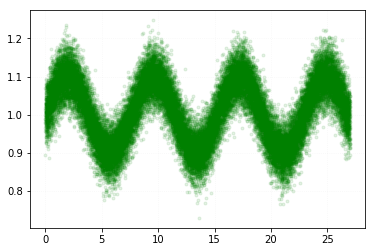

In [3]:
#Plot flux vs time with error bars
worksheet1data = pd.read_csv('worksheet1.txt', sep=" ", header=None)
worksheet1data.columns = ["time", "flux", "error"]
worksheet1data.head()

time, flux, err = np.loadtxt("worksheet1.txt").T
x = worksheet1data['time']
y = worksheet1data['flux']
yerr = worksheet1data['error']
fig, ax = plt.subplots()
ax.plot(x, y, ".", solid_capstyle='projecting', color='green', alpha=0.1)
ax.grid(alpha=0.1, linestyle=':')

#Period looks to be ~8.

In [4]:
def model(p, t):
    return 1 + 0.1 * np.sin(2 * np.pi * t / p)

In [5]:
%time

periods = np.random.random_sample(1000) * 10

chisq = []
t = worksheet1data['time'].values
f = worksheet1data['flux'].values

for p in periods:
    m = model(p, t)
    diff_sq = np.square(m - f)
    chi_sq = diff_sq.sum()
    
    chisq.append(chi_sq)
    
chisq = np.array(chisq)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11 µs


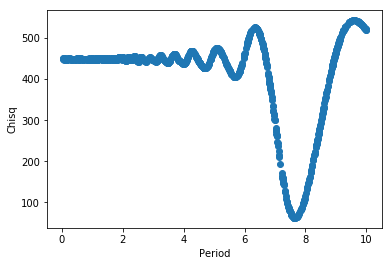

In [6]:
plt.scatter(periods, chisq)
plt.xlabel('Period')
plt.ylabel('Chisq')
plt.show()

#Period looks to be ~7.6

In [7]:
# Analytical 
index = chisq.argmin()
periods[index]

7.6480275772308595

In [8]:
likelihood = np.exp(-0.5 * (chisq - chisq.min()))

likelihood[:10]

array([  1.07385284e-080,   4.18840988e-085,   1.09738386e-081,
         3.99867957e-085,   3.34961424e-084,   2.53383662e-084,
         2.90249303e-099,   4.54086854e-022,   1.10123796e-102,
         9.21234276e-085])

In [9]:
sorted_inds = np.argsort(periods)
periods = periods[sorted_inds]
likelihood = likelihood[sorted_inds]

In [10]:
mask = (periods>7) & (periods <8)
periods = periods[mask]
likelihood = likelihood[mask]

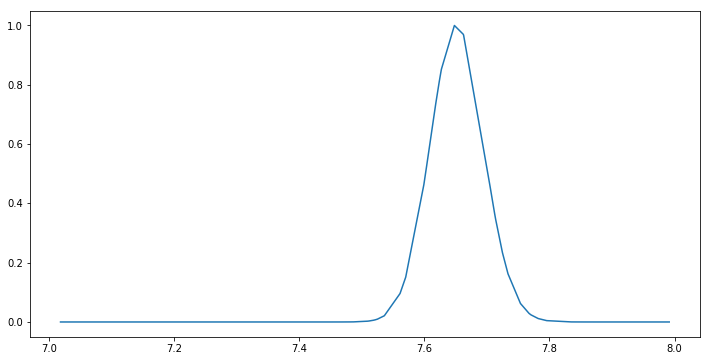

In [11]:
fig = plt.figure(figsize=(12, 6))

plt.plot(periods, likelihood, "-")

plt.show()

In [12]:
#fit a Gaussian
def Gaussian(x, mu, sigma):
    return np.exp( (-(x-mu)**2) / (2* (sigma**2)))
mu0 = 7.6465574089376958
sigma0 = 0.1

coeff, info = curve_fit(Gaussian, periods, likelihood, p0=[mu0, sigma0])
mu, sigma = coeff

print(info)
print(mu)
print(sigma)

[[  2.24868920e-09   7.22264761e-11]
 [  7.22264761e-11   1.53921860e-09]]
7.65184958215
0.0426253703379


In [13]:
print('P = {0} +/- {1}'.format(mu, sigma))
print( [(mu + sigma), (mu - sigma)] )
#Why is sigma SO high??

P = 7.651849582147462 +/- 0.0426253703379121
[7.6944749524853746, 7.6092242118095497]


In [14]:
gaussian_periods = np.random.normal(mu, sigma, size=100)
fit_prob = [Gaussian(p, mu, sigma) for p in gaussian_periods]

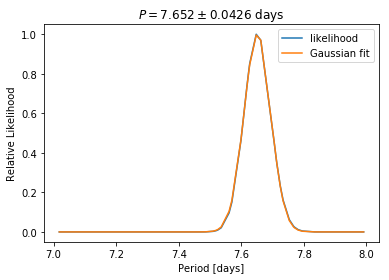

In [15]:
plt.plot(periods, likelihood, label="likelihood")
plt.plot(periods, Gaussian(periods, mu, sigma), label="Gaussian fit")
plt.legend()
plt.xlabel("Period [days]")
plt.ylabel(r"Relative Likelihood");
plt.title("$P = {:.3f} \pm {:.4f}$ days".format(mu, sigma));

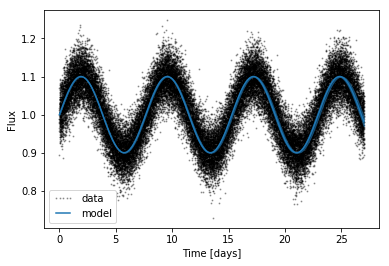

In [18]:
#fig = plt.figure(figsize=(12, 6))
plt.plot(time, flux, 'k.', ms=2, alpha=0.3, label="data", zorder=-1)
plt.plot(time, model(mu, t), label="model")
plt.fill_between(time, model(mu - sigma, t), model(mu + sigma, t), color="C0", alpha=0.5)
plt.xlabel("Time [days]")
plt.legend(numpoints=5)
plt.ylabel("Flux");